# CART Model

#### Project Objective
The project objective is to solve the business problem of an Insurance firm providing tour insurance which is facing higher claim frequency. The management decides to collect data from the past few years. We are assigned the task to make a model which predicts the claim status and provide recommendations to management. Using CART to draw inferences.


In [1]:
pacman::p_load(ggplot2,
               psych,
               readr,
               DataExplorer,
               rpart,
               rpart.plot,
               rsample,
               vip,
               ROCR,
               randomForest,
               caret,
               MLmetrics)

In [2]:
insurance <- read.csv("../input/travel-insurance/travel insurance.csv",header = TRUE)
summary(insurance)
insurance$Claim <- as.factor(insurance$Claim)
str(insurance)


     Agency             Agency.Type    Distribution.Channel
 EPX    :35119   Airlines     :17457   Offline: 1107       
 CWT    : 8580   Travel Agency:45869   Online :62219       
 C2B    : 8267                                             
 JZI    : 6329                                             
 SSI    : 1056                                             
 JWT    :  749                                             
 (Other): 3226                                             
                          Product.Name   Claim          Duration      
 Cancellation Plan              :18630   No :62399   Min.   :  -2.00  
 2 way Comprehensive Plan       :13158   Yes:  927   1st Qu.:   9.00  
 Rental Vehicle Excess Insurance: 8580               Median :  22.00  
 Basic Plan                     : 5469               Mean   :  49.32  
 Bronze Plan                    : 4049               3rd Qu.:  53.00  
 1 way Comprehensive Plan       : 3331               Max.   :4881.00  
 (Other)               

'data.frame':	63326 obs. of  11 variables:
 $ Agency              : Factor w/ 16 levels "ADM","ART","C2B",..: 4 4 7 7 7 10 7 7 7 7 ...
 $ Agency.Type         : Factor w/ 2 levels "Airlines","Travel Agency": 2 2 2 2 2 1 2 2 2 2 ...
 $ Distribution.Channel: Factor w/ 2 levels "Offline","Online": 1 1 2 2 2 2 2 2 2 2 ...
 $ Product.Name        : Factor w/ 26 levels "1 way Comprehensive Plan",..: 13 13 17 17 17 26 17 17 17 17 ...
 $ Claim               : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Duration            : int  186 186 65 60 79 66 47 63 57 186 ...
 $ Destination         : Factor w/ 149 levels "ALBANIA","ANGOLA",..: 80 80 5 5 62 141 141 5 130 5 ...
 $ Net.Sales           : num  -29 -29 -49.5 -39.6 -19.8 ...
 $ Commision..in.value.: num  9.57 9.57 29.7 23.76 11.88 ...
 $ Gender              : Factor w/ 3 levels "","F","M": 2 2 1 1 1 2 1 1 1 1 ...
 $ Age                 : int  81 71 32 32 41 44 32 29 44 37 ...


#### Data Dictionary

Below are the variables in the seven variables in the data set and its explaination:

* Age : Age of the insured customer
* Agency_Code: Code of tour firm
* Type: Type of tour insurance firms
* Claim: Target or the dependent variable :Claim Status
* Channel: Distribution channel of tour insurance agencies
* Commission: The commission received for tour insurance
* Sales : Amount of sales of tour insurance policies
* Product : Name of the tour insurance products
* Duration : Duration of the tour
* Destination : Destination of the tour


In [3]:
maxm <- max(insurance$Duration)
minm <- min(insurance$Duration)
insurance <- insurance[!insurance$Duration==maxm,]
insurance <- insurance[!insurance$Duration==minm,]


In [4]:
insurance$Distribution.Channel <- NULL


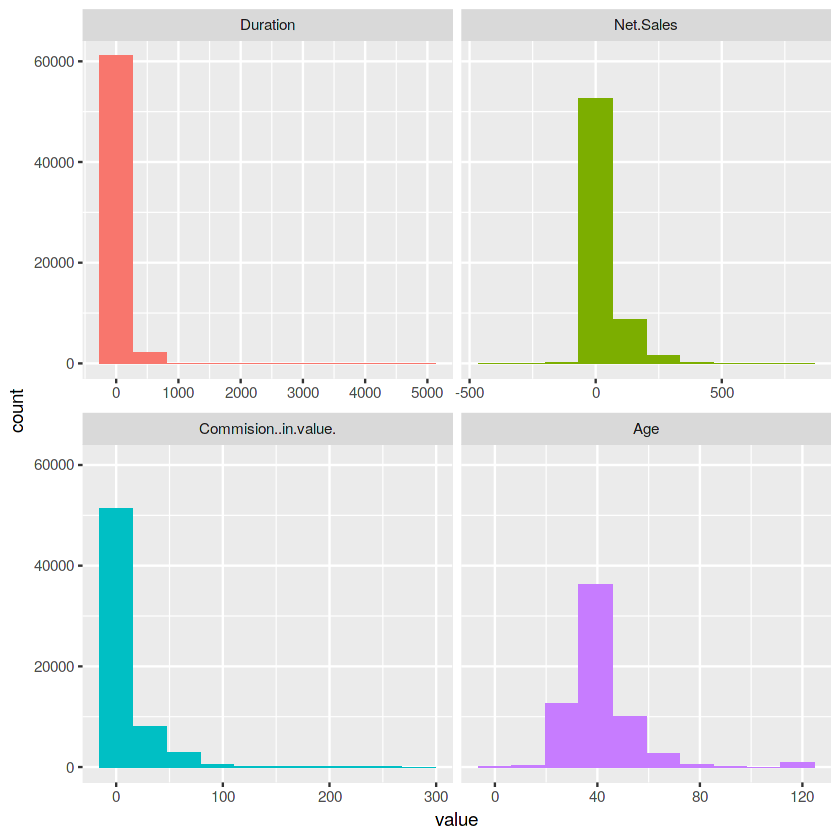

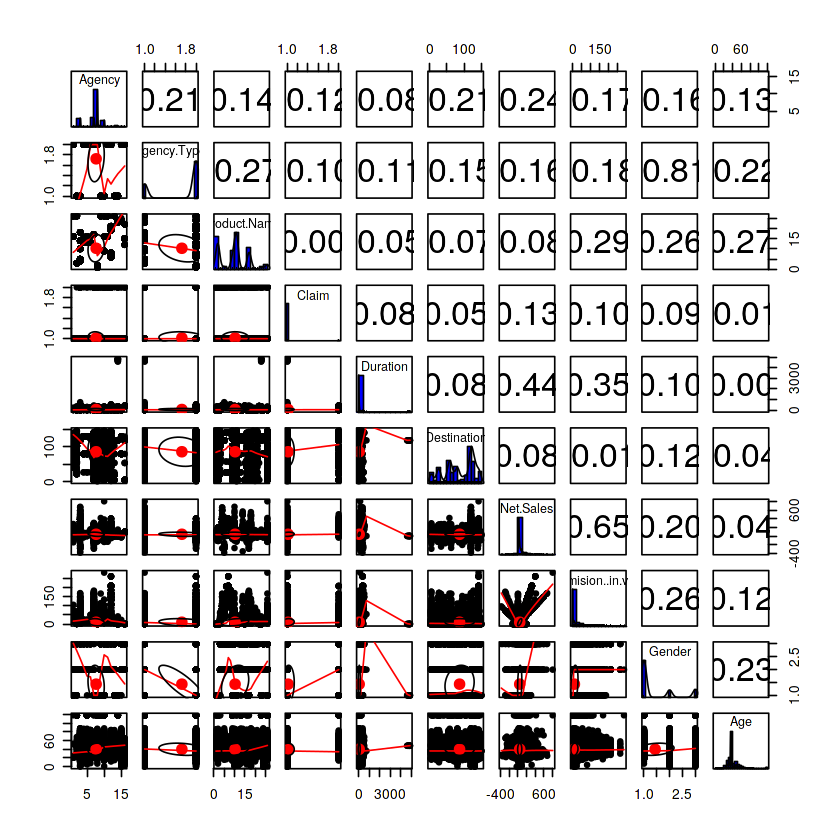

In [5]:
funModeling::plot_num(insurance)
psych::pairs.panels(insurance,hist.col = "blue")

In [6]:
###############################################################################################################
#                           Split the data into training and testing model                                    #
###############################################################################################################

set.seed(123)
datasplitting <- initial_split(data = insurance,prop = 0.7,strata = "Claim")

Insurance_train <- training(datasplitting)
Insurance_test <- testing(datasplitting)

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”



Classification tree:
rpart(formula = Claim ~ ., data = Insurance_train, method = "class", 
    control = cartctrl)

Variables actually used in tree construction:
[1] Age                  Agency               Commision..in.value.
[4] Destination          Duration             Gender              
[7] Net.Sales            Product.Name        

Root node error: 658/44327 = 0.014844

n= 44327 

           CP nsplit rel error xerror     xstd
1  0.00108554      0   1.00000 1.0000 0.038694
2  0.00086843     11   0.98480 1.0714 0.040030
3  0.00075988     20   0.97568 1.1170 0.040859
4  0.00063323     30   0.96809 1.1915 0.042175
5  0.00060790     49   0.95593 1.2447 0.043089
6  0.00054277     65   0.94225 1.2447 0.043089
7  0.00050659    143   0.88602 1.2948 0.043932
8  0.00045593    178   0.86778 1.2948 0.043932
9  0.00044699    194   0.85714 1.3359 0.044609
10 0.00037994    211   0.84954 1.3389 0.044658
11 0.00033772    235   0.84043 1.3678 0.045127
12 0.00030395    248   0.83587 1.3693 0.04

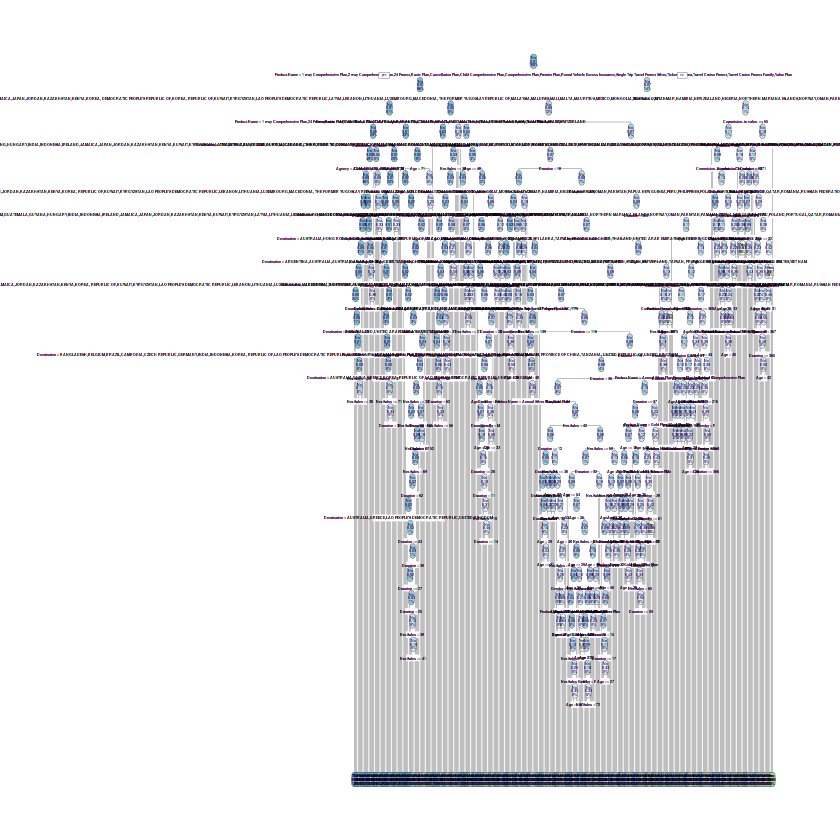

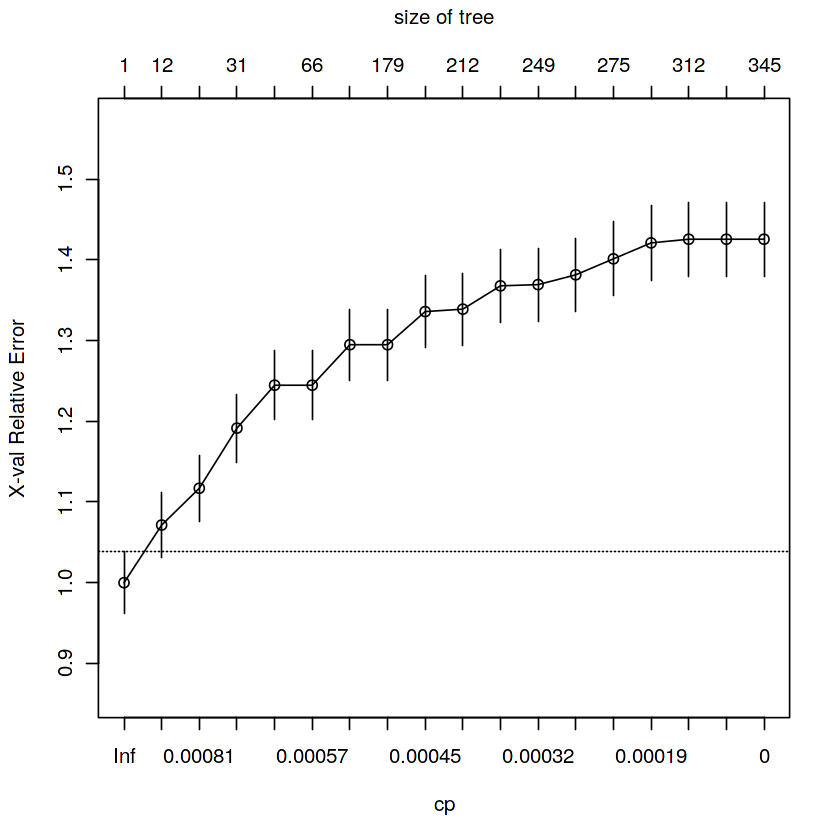

In [7]:
###############################################################################################################
#                                      CART MODEL                                                             #
###############################################################################################################
set.seed(123)
x <- 6

cartctrl <- rpart.control(minsplit = x, minbucket = round(x/3),xval = 5,cp = 0)

CARTmodel <- rpart(formula = Claim ~ .,data = Insurance_train,method = "class",control = cartctrl)


rpart.plot(CARTmodel)


printcp(CARTmodel)
plotcp(CARTmodel)




Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”



Classification tree:
rpart(formula = Claim ~ ., data = Insurance_train, method = "class", 
    control = cartctrl)

Variables actually used in tree construction:
[1] Age                  Agency               Commision..in.value.
[4] Destination          Duration             Gender              
[7] Net.Sales            Product.Name        

Root node error: 658/44327 = 0.014844

n= 44327 

          CP nsplit rel error xerror     xstd
1 0.00108554      0   1.00000 1.0000 0.038694
2 0.00086843     11   0.98480 1.0714 0.040030
3 0.00075988     20   0.97568 1.1170 0.040859
4 0.00063323     30   0.96809 1.1915 0.042175
5 0.00060790     49   0.95593 1.2447 0.043089
6 0.00060790     65   0.94225 1.2447 0.043089


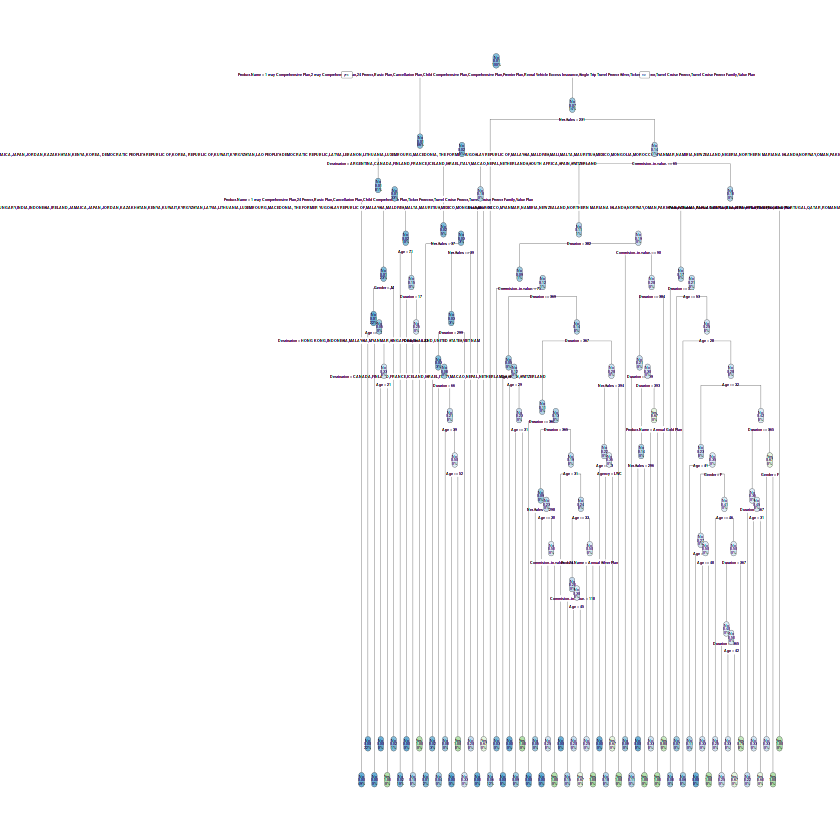

In [8]:
prunedCART <- prune(CARTmodel,cp = 0.00060790, "CP")

rpart.plot(prunedCART)
printcp(prunedCART)

In [9]:
###############################################################################################################
#                          Predict                                                                            #
###############################################################################################################


Newinsurancetrain <- Insurance_train


Newinsurancetrain$predictedclass <- predict(prunedCART,Newinsurancetrain,type = "class")

Newinsurancetrain$probscores <- predict(prunedCART,Newinsurancetrain)[,2]

In [10]:
###############################################################################################################
#                          Model Evaluation                                                                   #
###############################################################################################################

table(Newinsurancetrain$Claim,Newinsurancetrain$predictedclass,dnn = c("Actual","Predicted"))

MLmetrics::Accuracy(Newinsurancetrain$predictedclass,Newinsurancetrain$Claim)

MLmetrics::ConfusionMatrix(Newinsurancetrain$predictedclass,Newinsurancetrain$Claim)

confusionMatrix(table(Newinsurancetrain$Claim,Newinsurancetrain$predictedclass),positive = "Yes")


      Predicted
Actual    No   Yes
   No  43660     9
   Yes   611    47

[1] 0.986013

      y_pred
y_true    No   Yes
   No  43660     9
   Yes   611    47

Confusion Matrix and Statistics

     
         No   Yes
  No  43660     9
  Yes   611    47
                                          
               Accuracy : 0.986           
                 95% CI : (0.9849, 0.9871)
    No Information Rate : 0.9987          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1296          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.839286        
            Specificity : 0.986199        
         Pos Pred Value : 0.071429        
         Neg Pred Value : 0.999794        
             Prevalence : 0.001263        
         Detection Rate : 0.001060        
   Detection Prevalence : 0.014844        
      Balanced Accuracy : 0.912742        
                                          
       'Positive' Class : Yes             
                                          

[1] 0.8319885

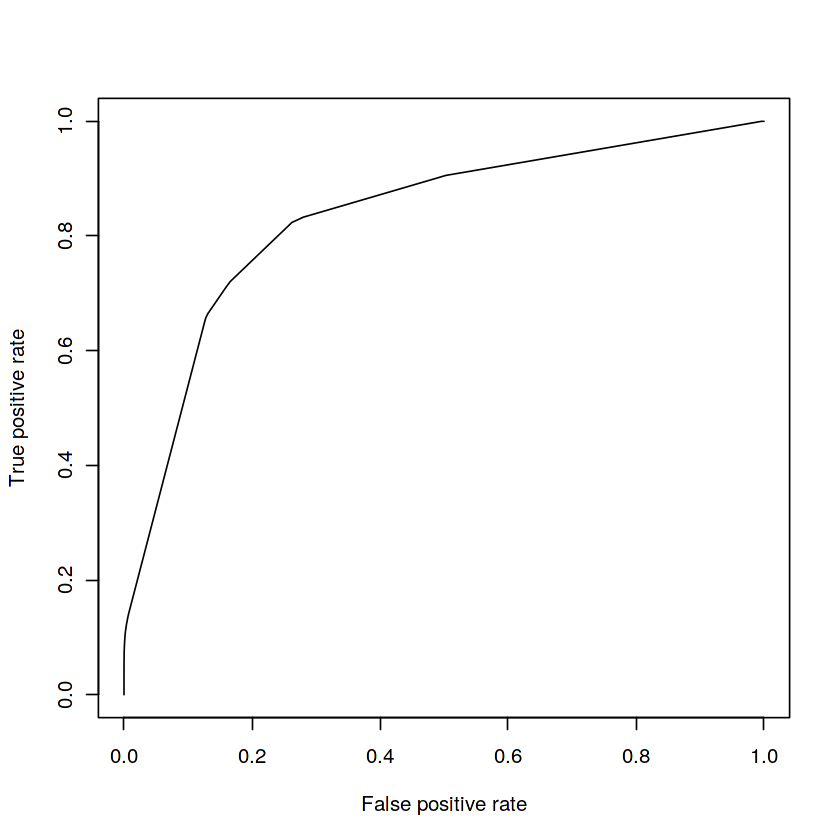

In [11]:

library(ROCR)

pred <- prediction(Newinsurancetrain$probscores,Newinsurancetrain$Claim)
perf <- performance(pred, "tpr", "fpr")
plot(perf)
auc <- performance(pred,"auc"); 
auc <- as.numeric(auc@y.values)
auc
